# Perceptron and LDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.utils import shuffle
from sklearn.linear_model import Perceptron
%matplotlib inline

## Perceptron

### Data Generation

In [3]:
# Data Generation
np.random.seed(1314)
def data_generation(n,basepoint,ylabel):
    x1 = np.random.random((n,))+np.array([basepoint[0]]*n)
    x2 = np.random.random((n,))+np.array([basepoint[1]]*n)
    y = np.array([ylabel]*n)
    data = pd.DataFrame({"x1":x1,"x2":x2,"y":y})
    return data

# positive data
positivedata = data_generation(n=30,basepoint=(1,2),ylabel=1)
# negative data
negativedata = data_generation(n=20,basepoint=(2,1),ylabel=-1)
# train data
train_data = pd.concat([positivedata,negativedata])
train_data = shuffle(train_data)
train_data.index = range(train_data.shape[0])
train_data.head(5)

,x1,x2,y
0,1.749421,2.193847,1
1,2.057071,1.983485,-1
2,2.830457,1.026819,-1
3,1.437378,2.345612,1
4,2.730692,1.493602,-1


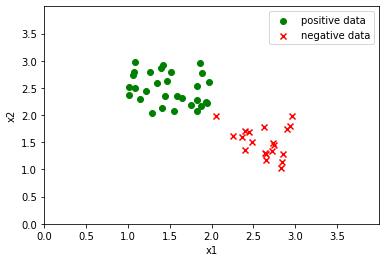

In [4]:
# train data scatter plot
plt.scatter(x=positivedata["x1"],y=positivedata["x2"],marker="o",c="green",label="positive data")
plt.scatter(x=negativedata["x1"],y=negativedata["x2"],marker="x",c="red",label="negative data")
plt.xlabel("x1")
plt.ylabel("x2")
plt.xlim((0,4))
plt.ylim((0,4))
plt.xticks(np.arange(0,4,0.5))
plt.yticks(np.arange(0,4,0.5))
plt.legend()

### Parameter Solving

In [81]:
def Perceptron_param_solving(train_data,lr,start_w):
    # initial parameter
    w = np.array(start_w) # w = [w1,w2,b]
    x = train_data[["x1","x2"]].values
    onecolumn = np.ones((train_data.shape[0],))
    X = np.column_stack((x,onecolumn))
    y = train_data["y"].values
    k = 0
    inter_data = {"k":[],"Parameter":[],"Loss Function":[],"Misclassifications":[],"Point Used for Update":[]}
    # stochastic gradient descent
    while np.any((np.dot(X,w)*y<0) | (np.dot(X,w)*y==0)):
        k += 1
        falseindex = np.where((np.dot(X,w)*y<0) | (np.dot(X,w)*y==0))

        # storing information about the iterative process
        if k%5 == 0:
            inter_data["k"].append(k)
            inter_data["Parameter"].append(w.round(4))
            falsedata = train_data.iloc[falseindex[0],:]
            x_falseclassified = falsedata[["x1","x2"]].values
            X_falseclassified = np.column_stack((x_falseclassified,np.ones((falsedata.shape[0],))))
            y_falseclassified = falsedata["y"].values
            loss = -sum(np.dot(X_falseclassified,w)*y_falseclassified)
            inter_data["Loss Function"].append(loss.round(4))
            inter_data["Misclassifications"].append(falseindex[0])
            inter_data["Point Used for Update"].append(falseindex[0][0])
        
        x_forupdate = train_data.iloc[falseindex[0][0],[0,1]].values
        y_forupdate = train_data.iloc[falseindex[0][0],[2]].values
        delta = np.append(lr*y_forupdate*x_forupdate,lr*y_forupdate)
        w = w + delta
    inter_information = pd.DataFrame(inter_data)

    result_data = {}
    result_data["final parameters"] = w.round(4)
    result_data["interative information"] = inter_information
    result_data["number of iterations"] = k
 
    return result_data
            
                

In [95]:
result = Perceptron_param_solving(train_data=train_data,lr=0.01,start_w=[1,1,1])

In [91]:
result["interative information"].head(5)

,k,Parameter,Loss Function,Misclassifications,Point Used for Update
0,5,"[-0.0062, 0.0042, 0.0]",0.0161,"[0, 5, 7, 9, 24, 28, 36, 43, 45, 49]",0
1,10,"[0.0052, 0.0304, 0.01]",1.3912,"[1, 2, 4, 10, 12, 13, 15, 18, 22, 29, 30, 32, ...",1
2,15,"[-0.0215, 0.0147, 0.0]",0.0564,"[0, 5, 7, 9, 24, 28, 36, 43, 45, 49]",0
3,20,"[-0.0102, 0.0409, 0.01]",0.9020,"[1, 2, 4, 10, 12, 13, 15, 18, 22, 29, 30, 32, ...",1
4,25,"[-0.0369, 0.0252, 0.0]",0.0967,"[0, 5, 7, 9, 24, 28, 36, 43, 45, 49]",0


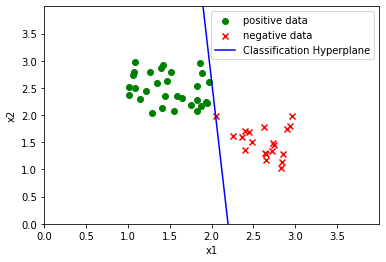

In [96]:
w = result["final parameters"]
x1_line = np.linspace(0,4,1000)
x2_line = (-w[0]*x1_line - w[2])/w[1]
plt.scatter(x=positivedata["x1"],y=positivedata["x2"],marker="o",c="green",label="positive data")
plt.scatter(x=negativedata["x1"],y=negativedata["x2"],marker="x",c="red",label="negative data")
plt.plot(x1_line,x2_line,c="blue",label="Classification Hyperplane")
plt.xlim((0,4))
plt.ylim((0,4))
plt.xticks(np.arange(0,4,0.5))
plt.yticks(np.arange(0,4,0.5))
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()

### Parameter solving with sklearn

In [23]:
# use sklearn to built perceptron model
train_data = np.array(train_data)
train_X,train_y = train_data[:,:-1],train_data[:,-1]

perceptron = Perceptron(fit_intercept=True,max_iter=1000,shuffle=True,eta0=0.1,tol=None)
perceptron.fit(train_X,train_y)
w = perceptron.coef_[0]
b = perceptron.intercept_
w_hat = np.append(w,b)
w_hat

array([-2.34288953,  2.37782521,  0.1       ])

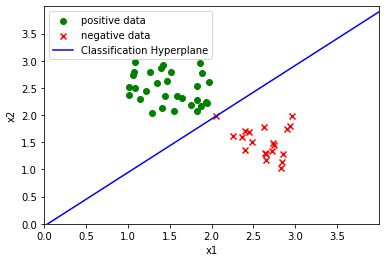

In [24]:
x1_line = np.linspace(0,4,1000)
x2_line = (-w_hat[0]*x1_line - w_hat[2])/w_hat[1]
plt.scatter(x=positivedata["x1"],y=positivedata["x2"],marker="o",c="green",label="positive data")
plt.scatter(x=negativedata["x1"],y=negativedata["x2"],marker="x",c="red",label="negative data")
plt.plot(x1_line,x2_line,c="blue",label="Classification Hyperplane")
plt.xlim((0,4))
plt.ylim((0,4))
plt.xticks(np.arange(0,4,0.5))
plt.yticks(np.arange(0,4,0.5))
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()

## Linear Discriminant Analysis

In [2]:
# Data Generation
np.random.seed(520)
def data_generation(n,basepoint,ylabel):
    x1 = np.random.random((n,))+np.array([basepoint[0]]*n)
    x2 = np.random.random((n,))+np.array([basepoint[1]]*n)
    y = np.array([ylabel]*n)
    data = pd.DataFrame({"x1":x1,"x2":x2,"y":y})
    return data

# positive data
positivedata = data_generation(n=30,basepoint=(1,2),ylabel=1)
# negative data
negativedata = data_generation(n=20,basepoint=(2,1),ylabel=0)
# train data
train_data = pd.concat([positivedata,negativedata])
train_data = shuffle(train_data)
train_data.index = range(train_data.shape[0])
train_data.head(5)

,x1,x2,y
0,2.799045,1.773208,0
1,1.586502,2.739881,1
2,2.664959,1.145345,0
3,1.059613,2.263852,1
4,1.279567,2.872181,1


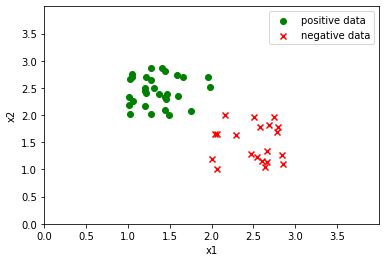

In [3]:
# train data scatter plot
plt.scatter(x=positivedata["x1"],y=positivedata["x2"],marker="o",c="green",label="positive data")
plt.scatter(x=negativedata["x1"],y=negativedata["x2"],marker="x",c="red",label="negative data")
plt.xlabel("x1")
plt.ylabel("x2")
plt.xlim((0,4))
plt.ylim((0,4))
plt.xticks(np.arange(0,4,0.5))
plt.yticks(np.arange(0,4,0.5))
plt.legend()

In [46]:
def LDA_param_solving(train_data):
    positive_data = train_data[train_data["y"]==1]
    negative_data = train_data[train_data["y"]==0]

    pos_X = np.array(positive_data.iloc[:,:-1])
    neg_X = np.array(negative_data.iloc[:,:-1])

    pos_X_mean = np.mean(pos_X,axis=0)
    pos_X_var = np.cov(pos_X,rowvar=False)
    neg_X_mean = np.mean(neg_X,axis=0)
    neg_X_var = np.cov(neg_X,rowvar=False)

    w = np.dot(np.linalg.inv(pos_X_var+neg_X_var),pos_X_mean-neg_X_mean)
    w = w/np.linalg.norm(w)

    return w.round(8)

In [47]:
w_hat = LDA_param_solving(train_data=train_data)
w_hat

array([-0.82349461,  0.56732409])

In [48]:
def LDA_threshold(train_data):
    w = LDA_param_solving(train_data)

    positive_data = train_data[train_data["y"]==1]
    negative_data = train_data[train_data["y"]==0]
    pos_X = np.array(positive_data.iloc[:,:-1])
    neg_X = np.array(negative_data.iloc[:,:-1])
    pos_X_mean = np.mean(pos_X,axis=0)
    neg_X_mean = np.mean(neg_X,axis=0)

    t = (np.dot(w,pos_X_mean)+np.dot(w,neg_X_mean))/2

    return round(t,8)

In [49]:
threshold = LDA_threshold(train_data)
threshold

-0.46889453

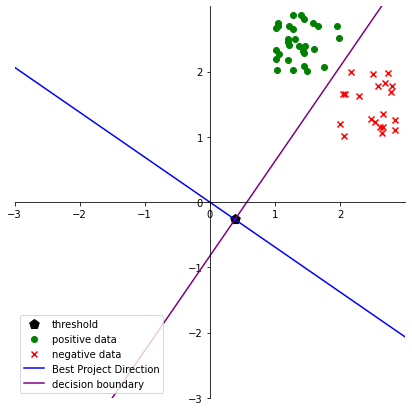

In [63]:
x1_line = np.linspace(-3,3,1000)
x2_line = (w_hat[1]/w_hat[0])*x1_line
theta = math.atan(w_hat[1]/w_hat[0])
threshold_x1 = -math.cos(-theta)*threshold
threshold_x2 = math.sin(-theta)*threshold
decision_boundary_x2 = (-w_hat[0]/w_hat[1])*x1_line+(threshold_x2+(w_hat[0]/w_hat[1])*threshold_x1)
plt.figure(figsize=(7, 7.2))
plt.scatter(x=threshold_x1,y=threshold_x2,marker="p",c="black",label="threshold",s=100,alpha=1)
plt.scatter(x=positivedata["x1"],y=positivedata["x2"],marker="o",c="green",label="positive data")
plt.scatter(x=negativedata["x1"],y=negativedata["x2"],marker="x",c="red",label="negative data")
plt.plot(x1_line,x2_line,c="blue",label="Best Project Direction")
plt.plot(x1_line,decision_boundary_x2,c="purple",label="decision boundary")
ax = plt.subplot()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_position(('data',0))
ax.spines['left'].set_position(('data',0))
plt.xlim((-3,3))
plt.ylim((-3,3))
plt.xticks(np.arange(-3,3,1))
plt.yticks(np.arange(-3,3,1))
plt.legend(loc="lower left")